In [ ]:
import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

import matplotlib.pyplot as plt
import seaborn as sns
# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


In [ ]:
import pandas as pd

# Descargar el archivo desde GitHub
!wget -O HR_capstone_dataset.csv https://raw.githubusercontent.com/AleGoMat/Various/main/google/data/HR_capstone_dataset.csv

# Cargar el archivo en un DataFrame de Pandas
df = pd.read_csv("HR_capstone_dataset.csv")

# Mostrar las primeras filas del DataFrame
df.head()


--2025-02-11 19:49:07--  https://raw.githubusercontent.com/AleGoMat/Various/main/google/data/HR_capstone_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 551785 (539K) [text/plain]
Saving to: ‘HR_capstone_dataset.csv’

HR_capstone_dataset 100%[===================>] 538.85K  --.-KB/s    in 0.04s   

2025-02-11 19:49:08 (14.3 MB/s) - ‘HR_capstone_dataset.csv’ saved [551785/551785]



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Gather basic information about the data
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Display all column names
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
### YOUR CODE HERE ###

df=df.rename(columns={'number_project' : 'number_projects',
                    'average_montly_hours' : 'average_monthly_hours',
                   'Work_accident' : 'work_accident',
                    'Department' : 'department'})
# Display all column names after the update
### YOUR CODE HERE ###
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_projects',
       'average_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [ ]:
# Check for missing values
### YOUR CODE HERE ###
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_projects,0
average_monthly_hours,0
time_spend_company,0
work_accident,0
left,0
promotion_last_5years,0
department,0
salary,0


In [ ]:
# Check for duplicates
### YOUR CODE HERE ###
df.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df1 = df.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

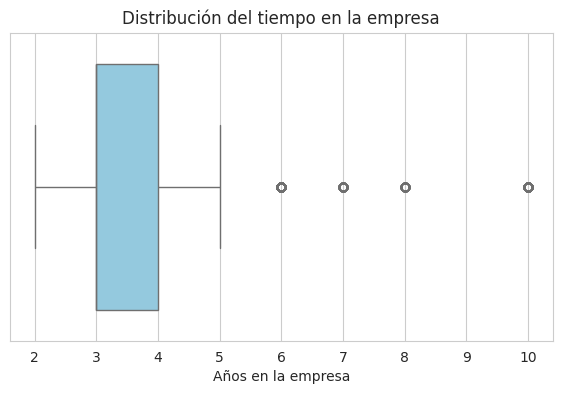

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(7, 4))

# Boxplot horizontal con mejor color
sns.boxplot(x=df1['time_spend_company'], color='skyblue')

# Mejoras en apariencia
plt.title("Distribución del tiempo en la empresa")
plt.xlabel("Años en la empresa")
plt.show()

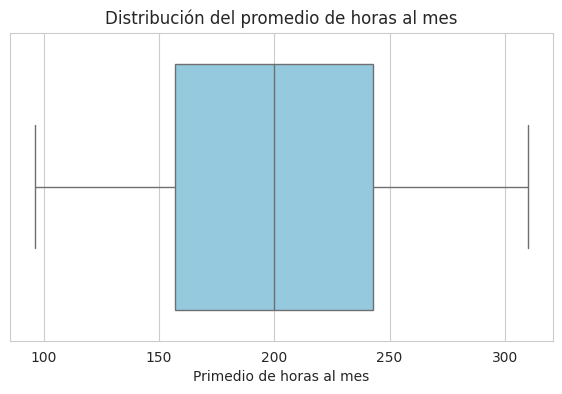

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(7, 4))

# Boxplot horizontal con mejor color
sns.boxplot(x=df1['average_monthly_hours'], color='skyblue')

# Mejoras en apariencia
plt.title("Distribución del promedio de horas al mes")
plt.xlabel("Primedio de horas al mes")
plt.show()

In [ ]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
P25=df1['time_spend_company'].quantile(0.25)
P75=df1['time_spend_company'].quantile(0.75)
IQR=P75-P25
upper_tenure = P75 + (IQR*1.5)
lower_tenure = P25 - (IQR*1.5)

print('lower tenure')
print(lower_tenure)
print('upper tenure')
print(upper_tenure)
print('max_tenure')
print(df1['time_spend_company'].max())

print("")
print("number of rows with 'tenure outliers'")
df1[(df1['time_spend_company']>upper_tenure) | (df1['time_spend_company']<lower_tenure)].shape[0]

lower tenure
1.5
upper tenure
5.5
max_tenure
10

number of rows with 'tenure outliers'


824

In [ ]:
df1['left'].unique()

array([1, 0])

Por definición, la columna de antigüedad del empleado presenta outliers. En particular, hay 824 observaciones con más de 5.5 años de antigüedad. Sin embargo, estos valores no parecen ser errores ni verdaderas anomalías. Además, no son lo suficientemente extremos como para sesgar significativamente nuestros modelos de machine learning.


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)


In [ ]:
# Get numbers of people who left vs. stayed
print("numbers of people who left vs. stayed")
### YOUR CODE HERE ###
print(df1.left.value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(round(df1.left.value_counts(normalize=True),2))

numbers of people who left vs. stayed
left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.83
1    0.17
Name: proportion, dtype: float64


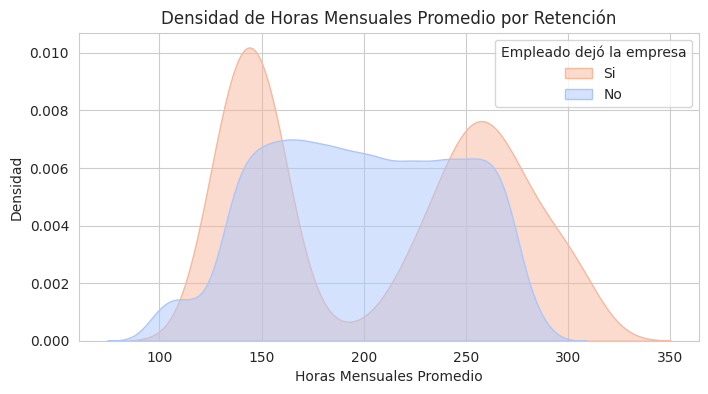

In [ ]:
sns.set_style("whitegrid")

# Crear el histograma correctamente
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df1, x='average_monthly_hours', hue='left', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)

plt.title("Densidad de Horas Mensuales Promedio por Retención")
plt.xlabel("Horas Mensuales Promedio")
plt.ylabel("Densidad")
plt.legend(title="Empleado dejó la empresa", labels=["Si", "No"])
plt.show()
#

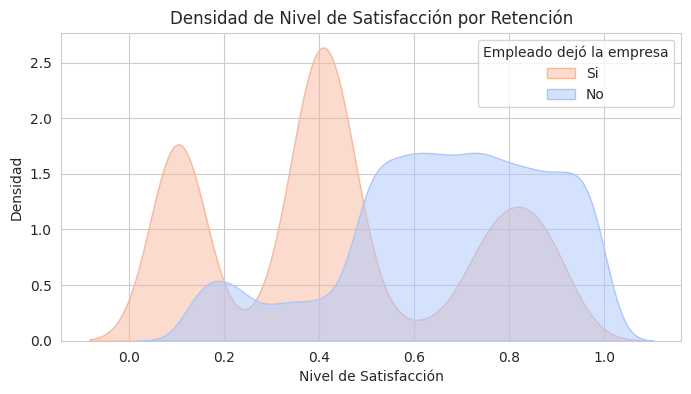

In [ ]:
sns.set_style("whitegrid")

# Crear el histograma correctamente
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df1, x='satisfaction_level', hue='left', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)

plt.title("Densidad de Nivel de Satisfacción por Retención")
plt.xlabel("Nivel de Satisfacción")
plt.ylabel("Densidad")
plt.legend(title="Empleado dejó la empresa", labels=["Si", "No"])
plt.show()
#

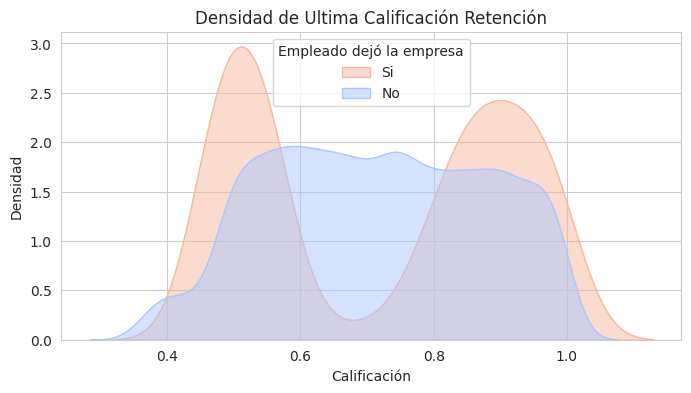

In [ ]:
sns.set_style("whitegrid")

# Crear el histograma correctamente
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df1, x='last_evaluation', hue='left', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)

plt.title("Densidad de Ultima Calificación Retención")
plt.xlabel("Calificación")
plt.ylabel("Densidad")
plt.legend(title="Empleado dejó la empresa", labels=["Si", "No"])
plt.show()
#

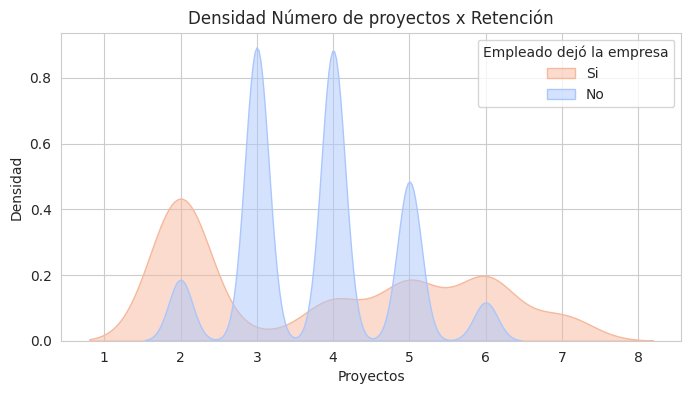

In [ ]:
sns.set_style("whitegrid")

# Crear el histograma correctamente
plt.figure(figsize=(8, 4))
sns.kdeplot(data=df1, x='number_projects', hue='left', fill=True, common_norm=False, palette='coolwarm', alpha=0.5)

plt.title("Densidad Número de proyectos x Retención")
plt.xlabel("Proyectos")
plt.ylabel("Densidad")
plt.legend(title="Empleado dejó la empresa", labels=["Si", "No"])
plt.show()
#

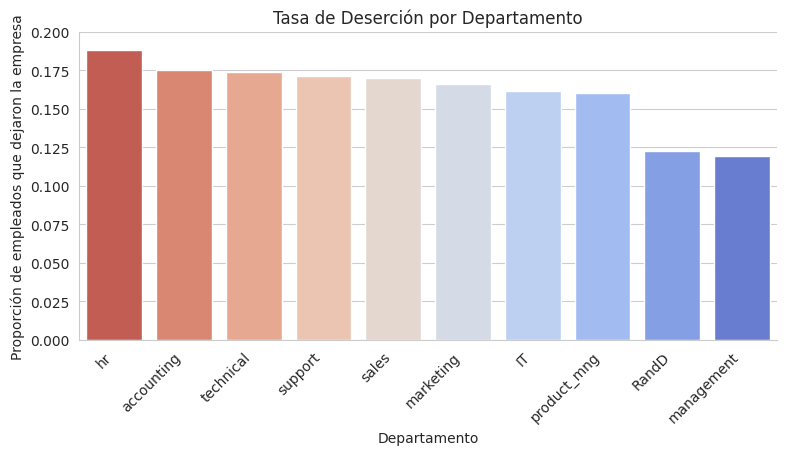

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y ordenar datos
department_zoom = df1.groupby('department', as_index=False)['left'].mean().sort_values('left', ascending=False)

# Configurar figura
plt.figure(figsize=(9, 4))
sns.set_style("whitegrid")  # Estilo más limpio

# Gráfico de barras sin warning y con mejor apariencia
ax = sns.barplot(data=department_zoom,x='department', hue='department', y='left', palette='coolwarm_r', legend=False)

# Mejoras en la visualización
plt.xticks(rotation=45, ha="right")  # Rotar etiquetas del eje X
plt.xlabel("Departamento")
plt.ylabel("Proporción de empleados que dejaron la empresa")
plt.title("Tasa de Deserción por Departamento")
plt.ylim(0, 0.2)  # Ya que es una proporción, los valores van de 0 a 1
sns.despine()  # Eliminar bordes innecesarios

plt.show()


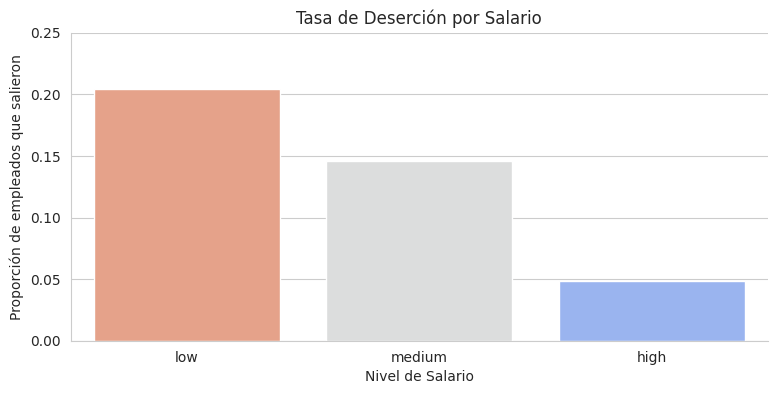

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y ordenar datos
department_zoom = df1.groupby('salary', as_index=False)['left'].mean().sort_values('left', ascending=False)

# Configurar figura
plt.figure(figsize=(9, 4))
sns.set_style("whitegrid")  # Estilo más limpio

# Gráfico de barras sin warning y con mejor apariencia
ax = sns.barplot(data=department_zoom,x='salary', hue='salary', y='left', palette='coolwarm_r', legend=False)

# Mejoras en la visualización

plt.xlabel("Nivel de Salario")
plt.ylabel("Proporción de empleados que salieron")
plt.title("Tasa de Deserción por Salario")
plt.ylim(0, 0.25)  # Ya que es una proporción, los valores van de 0 a 1
sns.despine()  # Eliminar bordes innecesarios

plt.show()

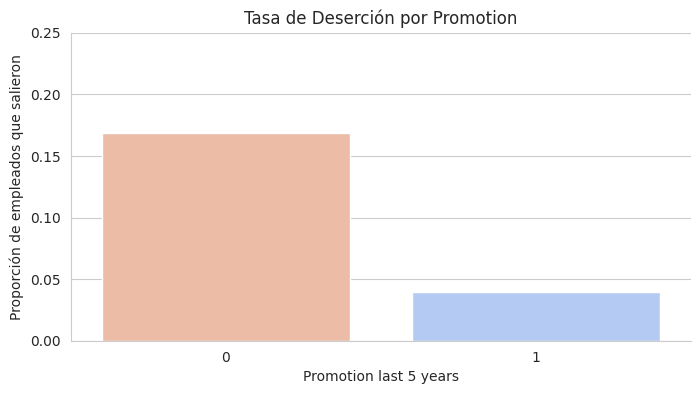

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y ordenar datos
department_zoom = df1.groupby('promotion_last_5years', as_index=False)['left'].mean().sort_values('left', ascending=False)

# Configurar figura
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")  # Estilo más limpio

# Gráfico de barras sin warning y con mejor apariencia
ax = sns.barplot(data=department_zoom,x='promotion_last_5years', hue='promotion_last_5years', y='left', palette='coolwarm_r', legend=False)

# Mejoras en la visualización

plt.xlabel("Promotion last 5 years")
plt.ylabel("Proporción de empleados que salieron")
plt.title("Tasa de Deserción por Promotion")
plt.ylim(0, 0.25)  # Ya que es una proporción, los valores van de 0 a 1
sns.despine()  # Eliminar bordes innecesarios

plt.show()

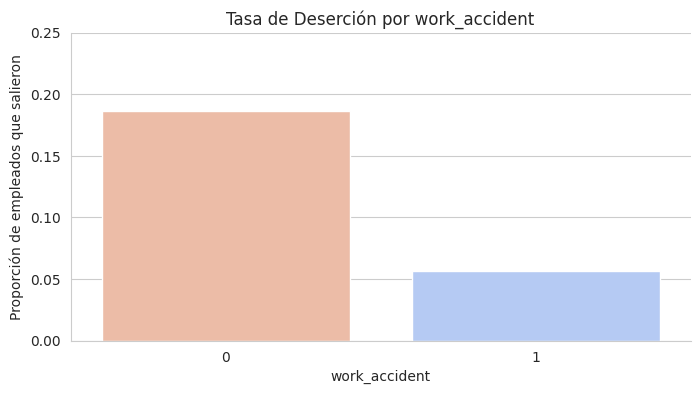

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar y ordenar datos
department_zoom = df1.groupby('work_accident', as_index=False)['left'].mean().sort_values('left', ascending=False)

# Configurar figura
plt.figure(figsize=(8, 4))
sns.set_style("whitegrid")  # Estilo más limpio

# Gráfico de barras sin warning y con mejor apariencia
ax = sns.barplot(data=department_zoom,x='work_accident', hue='work_accident', y='left', palette='coolwarm_r', legend=False)

# Mejoras en la visualización

plt.xlabel("work_accident")
plt.ylabel("Proporción de empleados que salieron")
plt.title("Tasa de Deserción por work_accident")
plt.ylim(0, 0.25)  # Ya que es una proporción, los valores van de 0 a 1
sns.despine()  # Eliminar bordes innecesarios

plt.show()

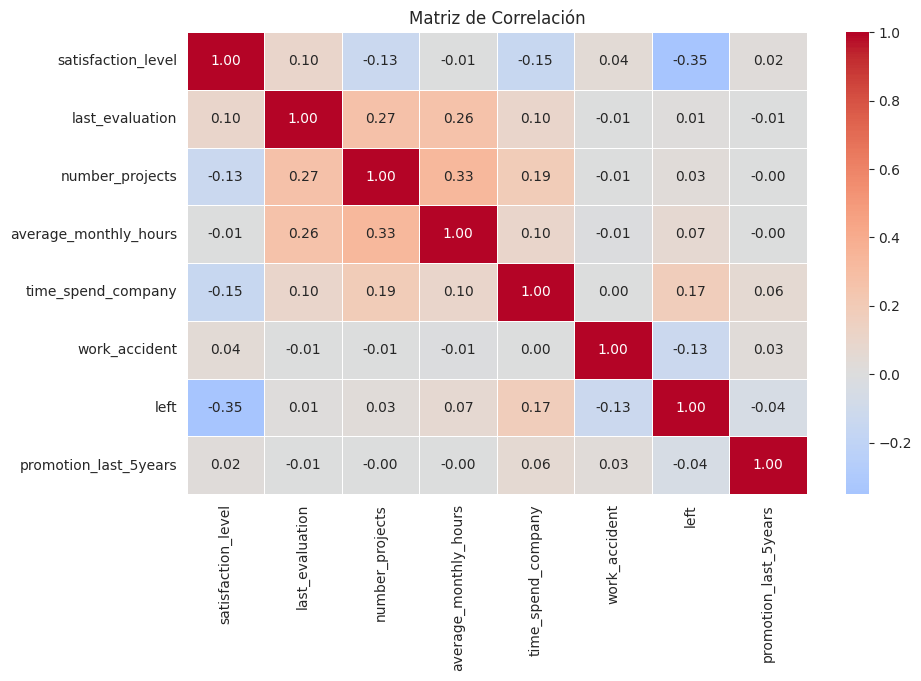

In [ ]:
df_numericas = df1.select_dtypes(include=['number'])
corr_matrix = df_numericas.corr()

# Crear la figura
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Graficar el heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, center=0)

# Título del gráfico
plt.title("Matriz de Correlación")
plt.show()


🔹 Regla práctica sobre multicolinealidad:
📌 Correlación (Pearson) entre variables independientes:
✅ < 0.5 → Baja correlación → No hay gran problema de multicolinealidad.
⚠️ 0.5 - 0.8 → Correlación moderada → Puede haber multicolinealidad leve.
🚨 > 0.8 → Alta correlación → Posible multicolinealidad fuerte.

In [ ]:
dummies_sales = pd.get_dummies(df1['department'], drop_first=True).astype(int)
dummies_salary = pd.get_dummies(df1['salary'], drop_first=True).astype(int)

df2 = pd.concat([df1, dummies_sales, dummies_salary], axis=1)

df2.drop(['department', 'salary'], axis=1, inplace=True)
df2.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,low,medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_projects        11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   RandD                  11991 non-null  int64  
 9   accounting             11991 non-null  int64  
 10  hr                     11991 non-null  int64  
 11  management             11991 non-null  int64  
 12  marketing              11991 non-null  int64  
 13  product_mng            11991 non-null  int64  
 14  sales                  11991 non-null  int64  
 15  support

In [ ]:
X = df2.drop(columns=['left'])  # Reemplaza 'target_column' con el nombre real de tu variable objetivo
y = df2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Verificar tamaños
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8993, 18) (2998, 18) (8993,) (2998,)


In [ ]:
cv_params_2 = {'n_estimators' : [80,100 ,120],
              #'max_depth' : [4,6,9],
              'max_depth' : [8, 9, 10],
              'min_samples_leaf' : [0.05, 0.075, 0.1],
              'min_samples_split' : [0.02, 0.05, 0.075]}

scoring = ['accuracy', 'f1', 'recall', 'precision']


rf = RandomForestClassifier(random_state=0, class_weight={0: 1, 1: 2} )

In [ ]:
cv_params_2

{'n_estimators': [80, 100, 120],
 'max_depth': [8, 9, 10],
 'min_samples_leaf': [0.05, 0.075, 0.1],
 'min_samples_split': [0.02, 0.05, 0.075]}

In [ ]:
rf_cv= GridSearchCV(rf, cv_params_2,scoring=scoring, cv=5, refit='f1', n_jobs = -1, verbose = 1)

In [ ]:
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)
print(rf_cv.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 8, 'min_samples_leaf': 0.05, 'min_samples_split': 0.02, 'n_estimators': 120}
0.7581646823401368


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Pickle the model
path = '/content/drive/MyDrive/'
with open(path+'rf_cv_model.pickle2', 'wb') as to_write:
    pickle.dump(rf_cv, to_write)

In [ ]:
with open(path + 'rf_cv_model.pickle2', 'rb') as to_read:
    rf_cv2 = pickle.load(to_read)

In [ ]:
#rf_cv.fit(X_train, y_train)
print(rf_cv2.best_params_)
print(rf_cv2.best_score_)

{'max_depth': 8, 'min_samples_leaf': 0.05, 'min_samples_split': 0.02, 'n_estimators': 120}
0.7581646823401368


In [ ]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

In [ ]:
# Make a results table for the rf_cv model using above function
rf_cv_results = make_results('Random Forest CV', rf_cv2)
rf_cv_results.head(2)

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.758165,0.670255,0.873508,0.928722
